# ドル円 為替レート 15分足

### 一つ上のディレクトリをパスに追加

In [111]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [112]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [113]:
code = "USDJPY=X"
symbol = code
ticker = yf.Ticker(symbol)
# 長めにデータを取得しておく
df = ticker.history(period='2d', interval='15m')
# タイムゾーンを日本時間に変換
df.index = df.index.tz_convert('Asia/Tokyo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-07-22 08:00:00+09:00,147.395004,147.460999,147.386002,147.455994,0,0.0,0.0
2025-07-22 08:15:00+09:00,147.457001,147.468002,147.391998,147.460007,0,0.0,0.0
2025-07-22 08:30:00+09:00,147.455994,147.470993,147.397003,147.429001,0,0.0,0.0
2025-07-22 08:45:00+09:00,147.429993,147.496002,147.388000,147.401001,0,0.0,0.0
2025-07-22 09:00:00+09:00,147.395996,147.701996,147.393005,147.701004,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-07-23 14:15:00+09:00,147.011002,147.070007,146.966995,147.013000,0,0.0,0.0
2025-07-23 14:30:00+09:00,147.014008,147.173996,146.981995,147.158997,0,0.0,0.0
2025-07-23 14:45:00+09:00,147.162994,147.207001,147.067001,147.156006,0,0.0,0.0


## 時間帯を固定

In [114]:
# 現在時刻から、本日の日付を使用する
dt = datetime.datetime.now()
# ザラ場の取引時間に固定する
dt_start = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 09:00:00+09:00")
dt_end = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 15:30:00+09:00")
df0 = df[(dt_start <= df.index) & (df.index <= dt_end)]
dt_first = df0.index[0]
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-07-23 09:00:00+09:00,146.761993,146.811996,146.615005,146.626999,0,0.0,0.0
2025-07-23 09:15:00+09:00,146.628006,146.638000,146.194000,146.212006,0,0.0,0.0
2025-07-23 09:30:00+09:00,146.209000,146.511002,146.201996,146.503006,0,0.0,0.0
2025-07-23 09:45:00+09:00,146.498993,146.533005,146.244003,146.434998,0,0.0,0.0
2025-07-23 10:00:00+09:00,146.434006,146.725006,146.384995,146.574005,0,0.0,0.0
2025-07-23 10:15:00+09:00,146.572998,146.643997,146.453995,146.498993,0,0.0,0.0
2025-07-23 10:30:00+09:00,146.492996,146.707993,146.438004,146.645996,0,0.0,0.0
2025-07-23 10:45:00+09:00,146.645996,146.675003,146.440002,146.604996,0,0.0,0.0
2025-07-23 11:00:00+09:00,146.608994,146.630005,146.416000,146.544998,0,0.0,0.0


## ローソク足チャート（小さいサイズ）

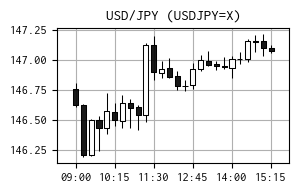

In [115]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df0,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()